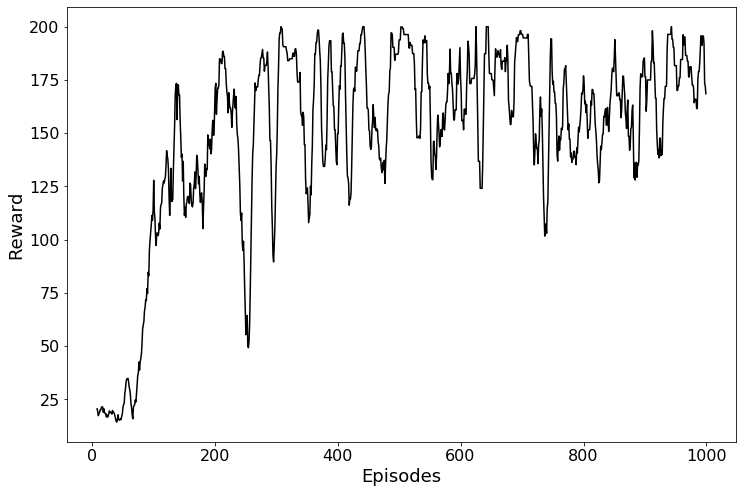

In [93]:
## Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Setup matplotlib
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.labelweight'] = 'regular'
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

## Read data ##
dir_name = '/home/schr476/Documents/fermilab-accelerator-ai/control-for-accelerators-in-hep-fnal/'
filename = 'dqn_cartpole_huber_clipnorm1_clipvalue05_episode_memory_1000_200'
data = pd.read_csv(dir_name+filename+'.log', sep=' ',
                 header=None, names=['current_state', 'action', 'reward','next_state', 'total_reward','done'])
#print('raw data:\n',data.head(2))

## Filter and plot
fig,ax = plt.subplots(1, 1,figsize=(12,8))
data = data[data.done==True]
data = data.reset_index()
data['total_reward_roll'] = data.total_reward.rolling(window=10).mean()
#print('\n \n filtered data:\n',data.head(-2))
#plt.plot(data['total_reward'], color='red')
plt.plot(data['total_reward_roll'], color='black')
ax.set_xlabel('Episodes')
ax.set_ylabel('Reward')
plt.show()
fig.savefig('reward_'+filename+'.png')